In [32]:
import h5py
import numpy as np

mat = h5py.File('./data/nyu_depth_v2_labeled.mat', 'r')

In [41]:
mat['images'] = np.transpose(np.array(mat['images']), (3, 1, 2, 0))   # Shape: (3, height, width, num_samples)
# Convert the depths to NumPy arrays and transpose
depths = np.array(mat['depths'])  # Shape: (height, width, num_samples)
depths_corrected = np.transpose(depths, (2, 0, 1))  # Now: (num_samples, height, width)

# Convert the labels to NumPy arrays and transpose
labels = np.array(mat['labels'])  # Shape: (height, width, num_samples)
labels_corrected = np.transpose(labels, (2, 0, 1))  # Now: (num_samples, height, width)


ValueError: Unable to create dataset (no write intent on file)

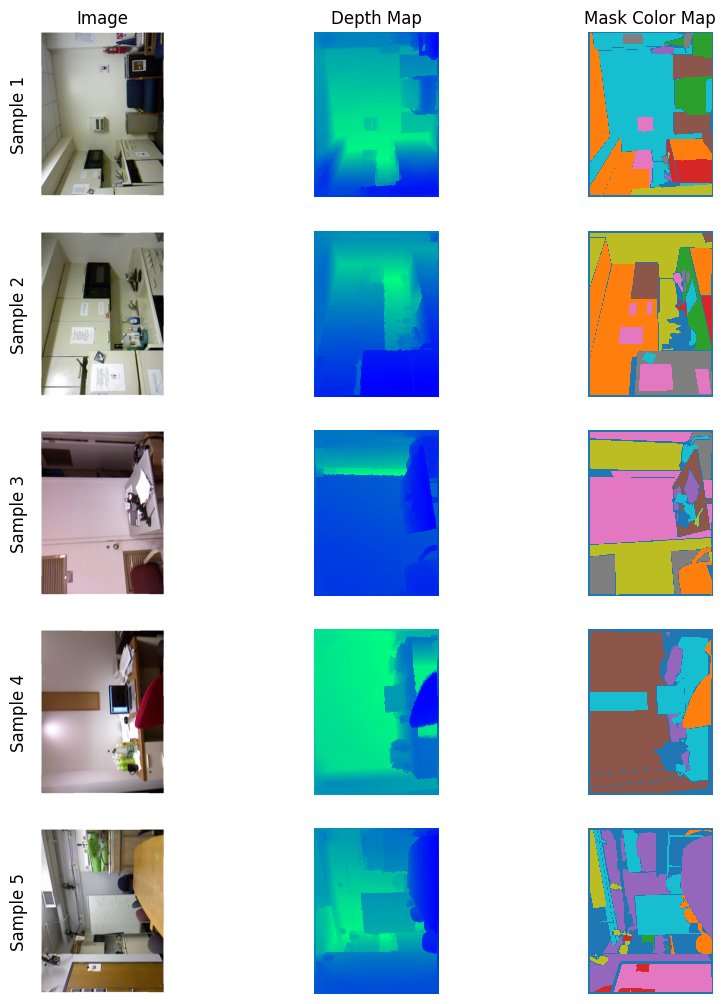

In [42]:
import matplotlib.pyplot as plt
import numpy as np

N_SAMPLES = 5

plt.figure(figsize=(10, 2.5*N_SAMPLES))

for i in range(N_SAMPLES):
    # Plot the image
    plt.subplot(N_SAMPLES, 3, i*3+1)
    r, g, b = mat['images'][i]
    image = np.dstack([r, g, b])
    plt.imshow(image)
    if i == 0:
        plt.title("Image")
    plt.axis('off')
    
    plt.annotate(f"Sample {i+1}", xy=(-0.1, 0.5), xycoords='axes fraction', 
                 fontsize=12, ha='right', va='center', rotation=90)

    plt.subplot(N_SAMPLES, 3, i*3+2)
    depth_map = mat['depths'][i]
    plt.imshow(depth_map, cmap='winter', interpolation='nearest')
    if i == 0:
        plt.title("Depth Map")
    plt.axis('off')

    plt.subplot(N_SAMPLES, 3, i*3+3)
    segmentation_mask = mat['labels'][i]
    plt.imshow(segmentation_mask, cmap='tab10', interpolation='nearest')
    if i == 0:
        plt.title("Mask Color Map")
    plt.axis('off')

plt.show()


1449